## MDPs in pymdptoolbox - Class Assignment

In this practical exercise, we will look at how MDP planning is implemented in a mathematical toolkit, and track the calculation of the rewards for each state via Value Iteration. The following code sets up an MDP environment (the basic case shown in class, shown in the Figure below) and computes the policy for the given MDP using the Value Iteration algorithm.

<img align="center" src="mdp_simple.png"/>

Then we provide a set of questions for you to implement and answer. This assignment is not graded.



In [1]:
# The line below is to be used if you have pymdptoolbox installed with setuptools
# import mdptoolbox.example
# Whereas the line below obviate the need to install that
import sys
sys.path.insert(1,'pymdptoolbox/src')
import mdptoolbox.example

import numpy as _np
from gen_scenario import *

"""
(Y,X)
| 00 01 02 ... 0X-1       'N' = North
| 10  .         .         'S' = South
| 20    .       .         'W' = West
| .       .     .         'E' = East
| .         .   .         'T' = Terminal
| .           . .         'O' = Obstacle
| Y-1,0 . . .   Y-1X-1
""" 

shape = [3,4]
rewards = [[0,3,100],[1,3,-100]]
obstacles = [[1,1]]
terminals = [[0,3],[1,3]]
P, RSS, R = mdp_grid(shape=shape, terminals=terminals, r=-3, rewards=rewards, obstacles=obstacles)
vi = mdptoolbox.mdp.ValueIterationGS(P, R, discount=0.99, epsilon=0.001, max_iter=1000, skip_check=True)

vi.run()
#You can check the quadrant values using print vi.V
# print_policy(vi.policy, shape, obstacles=obstacles, terminals=terminals)
display_policy(vi.policy, shape, obstacles=obstacles, terminals=terminals)


→,→,→,◎
↑,◾,↑,◎
↑,←,←,←


Here we plot the difference between each iteration of the Value Iteration algorithm using many different discount factors. To plot this image, you must install seaborn. To install seaborn run: 

```
pip3 install seaborn --user

```

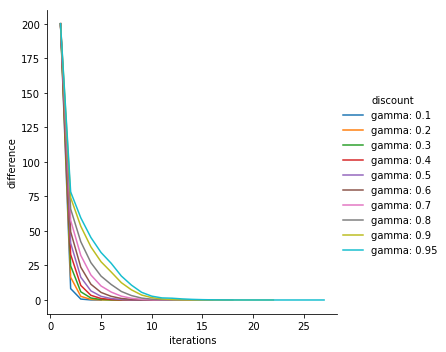

In [4]:
def plot(P, R, discounts=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95], epsilon=0.001, max_iter=1000):
    data_list = []
    import pandas as pd
    from matplotlib import pyplot as plt
    %matplotlib inline
    import seaborn as sns
    data_list = []
    for d in discounts:
        vis = mdptoolbox.mdp.ValueIteration(P, R, d, epsilon, max_iter, skip_check=True)
        vis.run()
        iterations = 1
        for value in vis.iterations_list:
            data_list.append([value, 'gamma: ' + str(d), iterations])
            iterations +=1
    data_frame2 = pd.DataFrame(data_list, columns=['difference', 'discount', 'iterations'])
    ax = sns.relplot(x = 'iterations', y = 'difference', hue='discount', kind="line", data=data_frame2)
plot(P,R)



You can use the following commands to check the difference of value-function values during each teration and the values of each value function.


In [ ]:
print(vi.iterations_list)
print(vi.v_list[-1])

Before you go for the questionnaire, take your time to open the source code of the MDP toolkit we use, specifically, look into these files:
1. [gen_scenario.py](gen_scenario.py) - contains the conversion code to make the simple coordinate commands above (e.g. ```shape = [3,4]```) into the matrices actually used by the MDP solver
2. [mdp.py](pymdptoolbox/src/mdptoolbox/mdp.py) - contains most of the logic for an MDP, including the *Bellman Equation* as follows:

$$V(s) = \left[ \max_{a} \gamma \sum_{s'}P(s'|s,a)*V(s') \right]+ R(s)$$

See if you can identify how this equation is implemented in the ```MDP._bellmanOperator``` with the [mdp.py](pymdptoolbox/src/mdptoolbox/mdp.py) file. Note how this implementation uses matrix multiplication to achieve the summation step described in the equation. Once you believe you understand that, go ahead and respond the questionnaire. 

### Questionnaire
1. Study the code of the cell above and answer the following questions.
	1. What is the policy generated if we change the discount factor of the grid domain to ```0.1```?
	2. Use the following line ```vi.verbose = True``` before ```vi.run()```:   
	What is the variation for each of the first three iterations with the discount factor of ```0.9``` and how many iterations does the algorithm take to converge?
	3. How does changes to the discount factor affect the variation of the state values over time?

In [ ]:
#1.A

In [ ]:
#1.B

In [ ]:
#1.C

2. The scenario below has an interesting structure whereby the positive rewarding terminal state is partially surrounded by negatively-rewarding states. Program this scenario in pymdptoolbox and compute the optimal policy with a discount factor of 0.99.

<img align="center" src="mdp-odd.png"/>




In [ ]:
#2

3. Define two new 5 by 5 scenarios with multiple obstacles and an interesting geometry following the guidelines below. Calculate the policy with discount factor 0.99, and then try to explain intuitively the reason for the resulting policies, given the initial parameters. These two scenarios must have the following characteristics:
	1. A scenario with one (or more) terminal states with positive rewards and at least one other state with the same amount of, but negative reward and no terminal states with negative rewards.
	2. A scenario with one terminal state with a negative reward and at least one non-terminal state with a positive reward.

In [ ]:
#3.A

In [ ]:
#3.B